Example 1 We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.
 
In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are,
 $$Maximize : A=xy=250*125=31250$$<p></p>
 $$Constraint : 500 = x + 2y$$<p></p>
 
 $$A=xy$$<p></p>
 $$500=x+2y$$<p></p>
 $$x=500-2y$$<p></p>
 $$A(y)=(500-2y)y=500y−2y^2$$<p></p>
 $$A′(y)=500-4y$$<p></p>
 $$A′(125)=500-4(125)$$<p></p>
 $$x=500-2(125)$$<p></p>
 $$x=250$$<p></p>


No handles with labels found to put in legend.


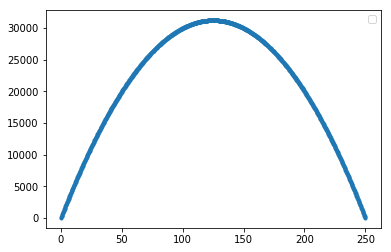

In [50]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

def main_fun_y(y):
  return 500*y-2*y**2

x_data = np.linspace(0, 250, 1000)
y_data = main_fun_y(x_data)
# Uncomment the following line to plot our input data.
pylab.plot(x_data, y_data, '.')
pylab.legend()

In [58]:
"""
2.1 one variable  method: using constraint to replace one variable 
    run tensorflow gradient descent to answer the question.
"""

y = tf.Variable(tf.random_uniform([1], 0,300))

func = 1000000-main_fun_y(y)

loss = func 
optimizer = tf.train.GradientDescentOptimizer(0.01) 
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train)
    print(sess.run([y]))

result = sess.run([y])
result_y = np.array2string(result[0][0])
print("y = "+result_y)
print("x = "+str(func_x(result[0][0])))
print("A = "+str(func_y(result[0][0])))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: Tensor("sub_19:0", shape=(1,), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7f960447df28>
train: name: "GradientDescent_9"
op: "NoOp"
input: "^GradientDescent_9/update_Variable_9/ApplyGradientDescent"

[array([136.17328], dtype=float32)]
[array([135.72635], dtype=float32)]
[array([135.2973], dtype=float32)]
[array([134.8854], dtype=float32)]
[array([134.48999], dtype=float32)]
[array([134.1104], dtype=float32)]
[array([133.74599], dtype=float32)]
[array([133.39615], dtype=float32)]
[array([133.0603], dtype=float32)]
[array([132.73788], dtype=float32)]
[array([132.42838], dtype=float32)]
[array([132.13124], dtype=float32)]
[array([131.846], dtype=float32)]
[array([131.57216], dtype=float32)]
[array([131.30927], dtype=float32)]
[array([131.0569], dtype=float32)]
[array([130.81462], dtype=float32)]
[array([130.58203], dtype=float32)]
[array([130.35

In [53]:
"""
2.2 one variable  method: using constraint to replace one variable 
    run genetic algorithm answer the question.
    GAFT基因演算法
"""

from math import sin, cos, pi
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitBigMutation
from gaft.analysis.fitness_store import FitnessStore
from gaft.analysis.console_output import ConsoleOutput
from best_fit import *

indv_template = BinaryIndividual(ranges=[(0, 300)], eps=0.001)
population = Population(indv_template=indv_template, size=50).init()

selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

@engine.fitness_register
def fitness(indv):
    y, = indv.solution
    return main_fun_y(y)

if '__main__' == __name__:
  engine.run(ng=100)

gaft.ConsoleOutput   INFO     Generation number: 100 Population number: 50
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 31241.676, scaled fitness: 31241.676
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 31250.000, scaled fitness: 31250.000
gaft.ConsoleOutput   INFO     Generation: 10, best fitness: 3

In [54]:
def main_fun_x(x):
  return 500-2*x

In [57]:
y = str(best_fit[-1][1][0])
x = str(main_fun_a(best_fit[-1][1][0]))
a = str(best_fit[-1][2])
print("y = "+y)
print("x = "+x)
print("A = "+a)

y = 125.00173568725586
x = 249.99652862548828
A = 31249.99999397478
